# Data visualization with Matplotlib


### Questions

  *  What happens if you can’t automatically produce plots?
  *  When to use Matplotlib for data visualization?
  *  When to prefer other libraries?

### Objective

 *    Be able to create simple plots with Matplotlib and tweak them
 *   Know about object-oriented vs pyplot interfaces of Matplotlib
 *   Be able to adapt gallery examples
 *   Know how to look for help
 *   Know that other tools exist



### Repeatability/reproducibility

From Claus O. Wilke: "Fundamentals of Data Visualization":

*One thing I have learned over the years is that automation is your friend. I think figures should be autogenerated as part of the data analysis pipeline (which should also be automated), and they should come out of the pipeline ready to be sent to the printer, no manual post-processing needed.*

* No manual post-processing. This will bite you when you need to regenerate 50 figures one day before submission deadline or regenerate a set of figures after the person who created them left the group.
* There is not the one perfect language and not the one perfect library for everything.
* Within Python, many libraries exist:
    * [Matplotlib](https://matplotlib.org/gallery.html): probably the most standard and most widely used
    * [Seaborn](https://seaborn.pydata.org/examples/index.html): high-level interface to Matplotlib, statistical functions built in
    * [Altair](https://altair-viz.github.io/gallery/index.html): declarative visualization (R users will be more at home), statistics built in
    * [Plotly](https://plotly.com/python/): interactive graphs
    * [Bokeh](https://demo.bokeh.org/): also here good for interactivity
    * [plotnine](https://plotnine.readthedocs.io/): implementation of a grammar of graphics in Python, it is based on ggplot2
    * [ggplot](https://yhat.github.io/ggpy/): R users will be more at home
    * [PyNGL](https://www.pyngl.ucar.edu/Examples/gallery.shtml): used in the weather forecast community
    * [K3D](https://k3d-jupyter.org/showcase/): Jupyter notebook extension for 3D visualization
    * …
* Two main families of libraries: procedural (e.g. Matplotlib) and declarative (using grammar of graphics).



### Why are we starting with Matplotlib?

* Matplotlib is perhaps the most “standard” Python plotting library.
* Many libraries build on top of Matplotlib.
* MATLAB users will feel familiar.
* Even if you choose to use another library (see above list), chances are high that you need to adapt a Matplotlib plot of somebody else.
* Libraries that are built on top of Matplotlib may need knowledge of Matplotlib for custom adjustments.

However it is a relatively low-level interface for drawing (in terms of abstractions, not in terms of quality) and does not provide statistical functions. Some figures require typing and tweaking many lines of code.

Many other visualization libraries exist with their own strengths, it is also a matter of personal preferences. Later we will also try other libraries.


### Getting started with Matplotlib

We can start in a Jupyter notebook since notebooks are typically a good fit for data visualizations. But if you prefer to run this as a script, this is also OK.

Let us create our first plot:

Text(0.5, 1.0, 'some title')

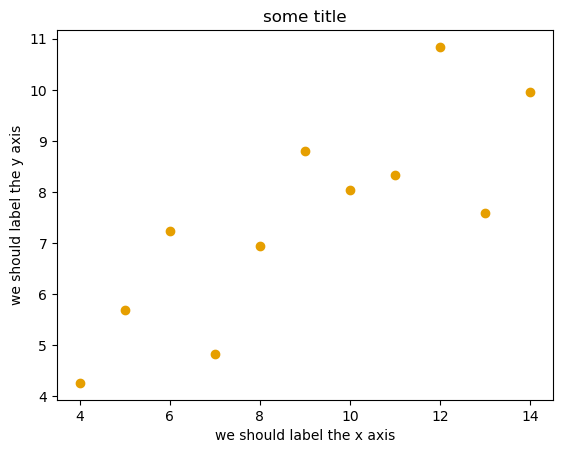

In [1]:
# this line tells Jupyter to display matplotlib figures in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

# this is dataset 1 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
data_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
data_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

fig, ax = plt.subplots()

ax.scatter(x=data_x, y=data_y, c="#E69F00")

ax.set_xlabel("we should label the x axis")
ax.set_ylabel("we should label the y axis")
ax.set_title("some title")

# uncomment the next line if you would like to save the figure to disk
# fig.savefig("my-first-plot.png")

This is the result of our first plot.

When running a Matplotlib script on a remote server without a “display” (e.g. compute cluster), you may need to add this line:

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("Agg")

# ... rest of the script

<div style="background-color:rgba(0,128,0,0.25)">

<div style="background-color:rgba(0,128,0,0.35)"> <h3> Exercise: Matplotlib</h3><br/></div>

* Extend the previous plot by also plotting this set of values but this time using a different color (#56B4E9):
```python
# this is dataset 2
data2_y = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
```
* Then add another color (#009E73) which plots the second dataset, scaled by 2.0.
```python
# here we multiply all elements of data2_y by 2.0
data2_y_scaled = [y*2.0 for y in data2_y]
```
* Try to add a legend to the plot with ax.legend() and searching the web for clues on how to add labels to each dataset.
* At the end it should look like this one:

![exercise.png](https://aaltoscicomp.github.io/python-for-scicomp/_images/exercise.png)
</div>

Text(0.5, 1.0, 'some title')

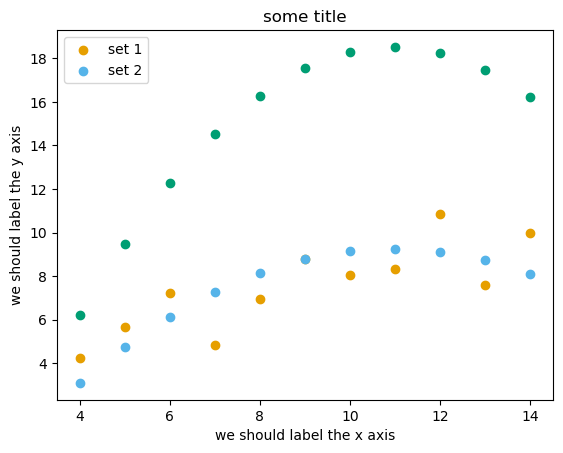

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

# this is dataset 1 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
data_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
data_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
data2_y = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
data2_y_scaled = [y*2.0 for y in data2_y]

fig, ax = plt.subplots()

s1 = ax.scatter(x=data_x, y=data_y, c="#E69F00")
s2 = ax.scatter(x=data_x, y=data2_y, c="#56B4E9")
ax.scatter(x=data_x, y=data2_y_scaled, c="#009E73")
ax.legend([s1, s2], ["set 1", "set 2"])

ax.set_xlabel("we should label the x axis")
ax.set_ylabel("we should label the y axis")
ax.set_title("some title")

### Matplotlib has two different interfaces

When plotting with Matplotlib, it is useful to know and understand that there are two approaches even though the reasons of this dual approach is outside the scope of this lesson.
* The more modern option is an object-oriented interface (the fig and ax objects can be configured separately and passed around to functions):

Text(0.5, 1.0, 'some title')

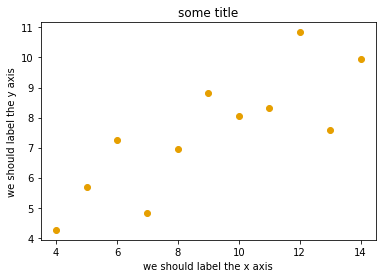

In [4]:
import matplotlib.pyplot as plt

# this is dataset 1 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
data_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
data_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

fig, ax = plt.subplots()

ax.scatter(x=data_x, y=data_y, c="#E69F00")

ax.set_xlabel("we should label the x axis")
ax.set_ylabel("we should label the y axis")
ax.set_title("some title")

* The more traditional option mimics MATLAB plotting and uses the pyplot interface (plt carries the global settings):

Text(0.5, 1.0, 'some title')

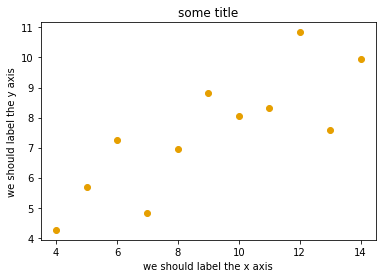

In [5]:
import matplotlib.pyplot as plt

# this is dataset 1 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
data_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
data_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

plt.scatter(x=data_x, y=data_y, c="#E69F00")

plt.xlabel("we should label the x axis")
plt.ylabel("we should label the y axis")
plt.title("some title")

When searching for help on the internet, you will find both approaches, they can also be mixed. Although the pyplot interface looks more compact, we recommend to learn and use the object oriented interface.

### Why do we emphasize this?

One day you may want to write functions which wrap around Matplotlib function calls and then you can send fig and ax into these functions and there is less risk that adjusting figures changes settings also for unrelated figures created in other functions.

When using the pyplot interface, settings are modified for the entire plt package. The latter is acceptable for linear scripts but may yield surprising results when introducing functions to enhance/abstract Matplotlib calls.


Styling and customizing plots

* Do not customize “manually” using a graphical program (not easily repeatable/reproducible).
* No manual post-processing. This will bite you when you need to regenerate 50 figures one day before submission deadline or regenerate a set of figures after the person who created them left the group.
* Matplotlib and also all the other libraries allow to customize almost every aspect of a plot.
* It is useful to study [Matplotlib parts of a figure](https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure) so that we know what to search for to customize things.
* Matplotlib cheatsheets: [https://github.com/matplotlib/cheatsheets](https://github.com/matplotlib/cheatsheets)
* You can also select among pre-defined themes/ style sheets, for instance:
```python
plt.style.use('ggplot')
```

### Exercises: Styling and customization

Here are 3 exercises where we try to adapt existing scripts to either tweak how the plot looks (exercises 1 and 2) or to modify the input data (example 3).

This is very close to real life: there are so many options and possibilities and it is almost impossible to remember everything so this strategy is useful to practice:

*    select an example that is close to what you have in mind
*    being able to adapt it to your needs
*    being able to search for help
*    being able to understand help request answers (not easy)


<div style="background-color:rgba(0,128,0,0.25)">
<div style="background-color:rgba(0,128,0,0.35)"><h3> Exercise Customization-1: log scale in Matplotlib</h3><br/></div>
    
In this exercise we will learn how to use log scales.

To demonstrate this we first fetch some data to plot:

```python 
import pandas as pd
url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminder_with_codes.csv"
data = pd.read_csv(url)
data_2007 = data[data["year"] == 2007]
data_2007
```

Try the above snippet in a notebook and it will give you an overview over the data.

Then we can plot the data, first using a linear scale:

```python
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x=data_2007["gdpPercap"], y=data_2007["lifeExp"], alpha=0.5)
ax.set_xlabel("GDP (USD) per capita")
ax.set_ylabel("life expectancy (years)")
```

This is the result but we realize that a linear scale is not ideal here:

![linear.png](https://aaltoscicomp.github.io/python-for-scicomp/_images/gapminder-linear.png)

Your task is to switch to a log scale and arrive at this result:
    
![log.png](https://aaltoscicomp.github.io/python-for-scicomp/_images/gapminder-log.png)
    
What does alpha=0.5 do?

</div>

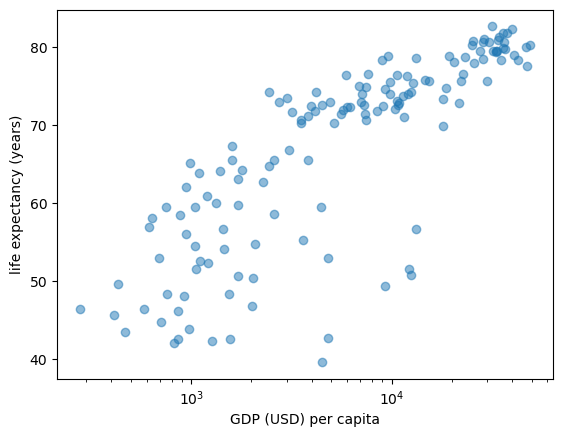

In [13]:
import pandas as pd
url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminder_with_codes.csv"
data = pd.read_csv(url)
data_2007 = data[data["year"] == 2007]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x=data_2007["gdpPercap"], y=data_2007["lifeExp"], alpha=0.5)
ax.set_xlabel("GDP (USD) per capita")
ax.set_ylabel("life expectancy (years)")
ax.set_xscale("log")

<div style="background-color:rgba(0,128,0,0.25)">
<div style="background-color:rgba(0,128,0,0.35)"><h3> Exercise Customization-2: preparing a plot for publication</h3><br/></div>

Often we need to create figures for presentation slides and for publications but both have different requirements: for presentation slides you have the whole screen but for a figure in a publication you may only have few centimeters/inches.

For figures that go to print it is good practice to look at them at the size they will be printed in and then often fonts and tickmarks are too small.

Your task is to make the tickmarks and the axis label font larger, using [Matplotlib parts of a figure](https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure) and web search, and to arrive at this:
    
![large_font.png](https://aaltoscicomp.github.io/python-for-scicomp/_images/gapminder-larger-font.png)
</div>


<div style="background-color:rgba(0,128,0,0.25)">
<div style="background-color:rgba(0,128,0,0.35)"><h3> Exercise Customization-3: adapting a gallery example</h3><br/></div>

This is a great exercise which is very close to real life.

* Your task is to select one visualization library (some need to be installed first - in doubt choose Matplotlib or Seaborn since they are part of Anaconda installation):
    * [Matplotlib](https://matplotlib.org/stable/gallery/index.html): probably the most standard and most widely used
    * [Seaborn](https://seaborn.pydata.org/examples/index.html): high-level interface to Matplotlib, statistical functions built in
    * [Altair](https://altair-viz.github.io/gallery/index.html): declarative visualization (R users will be more at home), statistics built in
    * [Plotly](https://plotly.com/python/): interactive graphs
    * [Bokeh](https://demo.bokeh.org/): also here good for interactivity
    * [plotnine](https://plotnine.readthedocs.io/): implementation of a grammar of graphics in Python, it is based on [ggplot2](https://ggplot2.tidyverse.org/)
    * [ggplot](https://yhat.github.io/ggpy/): R users will be more at home
    * [PyNGL](https://www.pyngl.ucar.edu/Examples/gallery.shtml): used in the weather forecast community
    * [K3D](https://k3d-jupyter.org/showcase/): Jupyter notebook extension for 3D visualization
* Browse the various example galleries (links above).
* Select one example that is close to your recent visualization project or simply interests you.
* First try to reproduce this example in the Jupyter notebook.
* Then try to print out the data that is used in this example just before the call of the plotting function to learn about its structure. Is it a pandas dataframe? Is it a NumPy array? Is it a dictionary? A list? a list of lists?
* Then try to modify the data a bit.
* If you have time, try to feed it different, simplified data. This will be key for adapting the examples to your projects.

</div>
